# PyTorch Workflow

Let's explore a an example PyTorch end-to-end workflow.

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [1193]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluting a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [1194]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.0+cu118'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel speadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA 
* Text

Machine learning is a game of two parts: 
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**. 

In [1195]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)

Y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [1196]:
X.squeeze().shape, X.shape

(torch.Size([50]), torch.Size([50, 1]))

In [1197]:
len(X), len(Y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [1198]:
# Create a train/test split
train_split = int (0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test), 

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [1199]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):    
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(X_train, Y_train, c="blue", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(X_test, Y_test, c="green", s=4, label="Testing data")
    
    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(X_test, predictions, c="red", s=4, label="Testing data")

    # Show the legend
    plt.legend(prop={"size": 14});


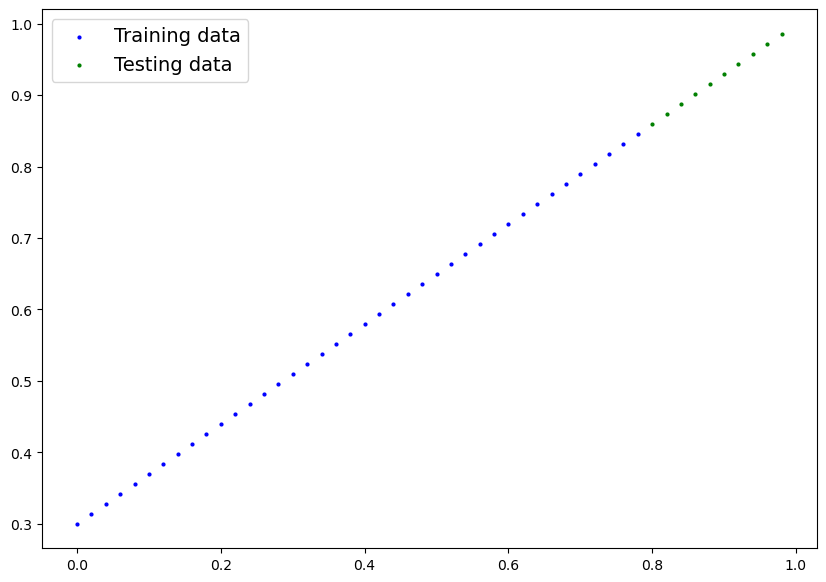

In [1200]:
plot_predictions();

## 2. Build model 

Our first PyTorch model!

This is very exciting... let's do it!

Because we're going to be building classes throughout the course, I'd recommend getting familiar with OOP in Python, to do so you can use the following resource from Real Python: https://realpython.com/python3-object-oriented-programming/

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent - https://youtu.be/IHZwWFHWa-w
2. Backpropagation - https://youtu.be/Ilg3gGewQ5U

In [1201]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhits from nn.Module
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                                requires_grad=True, # <- can this parameter be updated via gradient descent?
                                                dtype=torch.float)) # <- PyTorch loves the datatype torch.float32
        
        self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                            requires_grad=True, # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float)) # <- PyTorch loves the datatype torch.float32 
        
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weight * x + self.bias # this is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us 
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation 

See more of these essential modules via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html 

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`.

In [1202]:
torch.randn(1)

tensor([-1.3003])

In [1203]:
torch.manual_seed(33)
torch.randn(1)

tensor([1.1982])

In [1204]:
# Create a random seed
torch.manual_seed(33)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([1.1982], requires_grad=True),
 Parameter containing:
 tensor([-0.3998], requires_grad=True)]

In [1205]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([1.1982])), ('bias', tensor([-0.3998]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [1206]:
X_test, Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [1207]:
Y_preds = model_0(X_test)
Y_preds

tensor([[0.5587],
        [0.5827],
        [0.6067],
        [0.6306],
        [0.6546],
        [0.6785],
        [0.7025],
        [0.7265],
        [0.7504],
        [0.7744]], grad_fn=<AddBackward0>)

In [1208]:
# Make predictions with model
with torch.inference_mode():
  Y_preds = model_0(X_test)
  

# # You can also do something similar with torch.no_grad(), however, torch.inference_mode() is preferred
# with torch.no_grad():
#   Y_preds = model_0(X_test)

Y_preds

tensor([[0.5587],
        [0.5827],
        [0.6067],
        [0.6306],
        [0.6546],
        [0.6785],
        [0.7025],
        [0.7265],
        [0.7504],
        [0.7744]])

In [1209]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

See more on inference mode here - https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=cnKavO9iTgwQ-rfri6u7PQ 

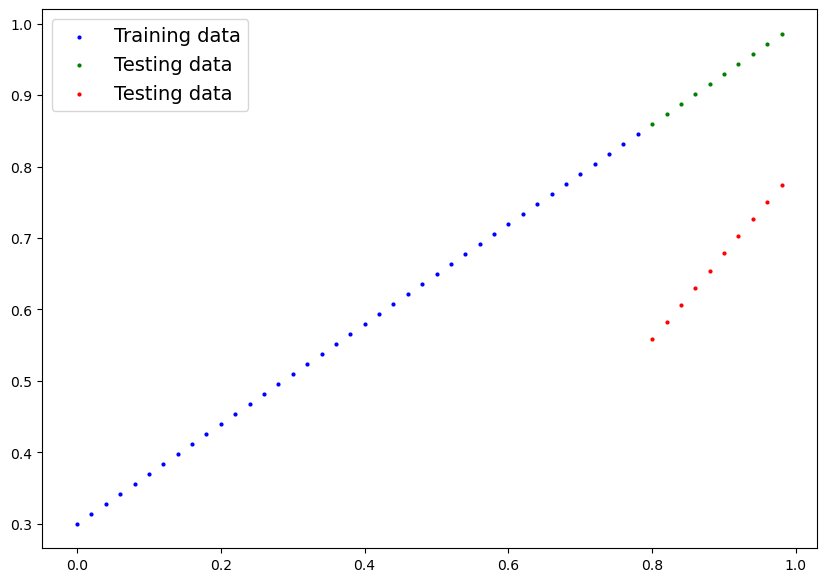

In [1210]:
plot_predictions(predictions=Y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function - https://pytorch.org/docs/stable/optim.html#module-torch.optim
  * Inside the optimizer you'll often have to set two parameters:
    * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
    * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [1211]:
list(model_0.parameters())

[Parameter containing:
 tensor([1.1982], requires_grad=True),
 Parameter containing:
 tensor([-0.3998], requires_grad=True)]

In [1212]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weight', tensor([1.1982])), ('bias', tensor([-0.3998]))])

In [1213]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), # we want to optimize the parameters present in our model
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set

In [1214]:
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

> **Q:** Which loss function and optimizer should I use?
>
> **A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.
>
> For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.
>
> But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss). 

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation 
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation** - https://www.youtube.com/watch?v=tIeHLnjs5U8)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent** - https://youtu.be/IHZwWFHWa-w)

In [1215]:
list(model_0.parameters())

[Parameter containing:
 tensor([1.1982], requires_grad=True),
 Parameter containing:
 tensor([-0.3998], requires_grad=True)]

In [1216]:
model_0.state_dict()

OrderedDict([('weight', tensor([1.1982])), ('bias', tensor([-0.3998]))])

In [1217]:
# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 1000

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients 

    # 1. Forward pass
    Y_preds = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(Y_preds, Y_train)
    print(f"Loss: {loss}")

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model (calculate gradients of each parameter)
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

    ### Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)

    # Print out model state_dict()
    print(model_0.state_dict())

Loss: 0.5055332183837891
OrderedDict([('weight', tensor([1.2021])), ('bias', tensor([-0.3898]))])
Loss: 0.49401211738586426
OrderedDict([('weight', tensor([1.2060])), ('bias', tensor([-0.3798]))])
Loss: 0.4824911653995514
OrderedDict([('weight', tensor([1.2099])), ('bias', tensor([-0.3698]))])
Loss: 0.4709702134132385
OrderedDict([('weight', tensor([1.2138])), ('bias', tensor([-0.3598]))])
Loss: 0.4594491124153137
OrderedDict([('weight', tensor([1.2177])), ('bias', tensor([-0.3498]))])
Loss: 0.44792813062667847
OrderedDict([('weight', tensor([1.2216])), ('bias', tensor([-0.3398]))])
Loss: 0.43640708923339844
OrderedDict([('weight', tensor([1.2255])), ('bias', tensor([-0.3298]))])
Loss: 0.4248860776424408
OrderedDict([('weight', tensor([1.2294])), ('bias', tensor([-0.3198]))])
Loss: 0.41336506605148315
OrderedDict([('weight', tensor([1.2333])), ('bias', tensor([-0.3098]))])
Loss: 0.4018440842628479
OrderedDict([('weight', tensor([1.2372])), ('bias', tensor([-0.2998]))])
Loss: 0.39032307

In [1218]:
weight, bias

(0.7, 0.3)

In [1219]:
with torch.inference_mode():
    Y_preds_new = model_0(X_test)

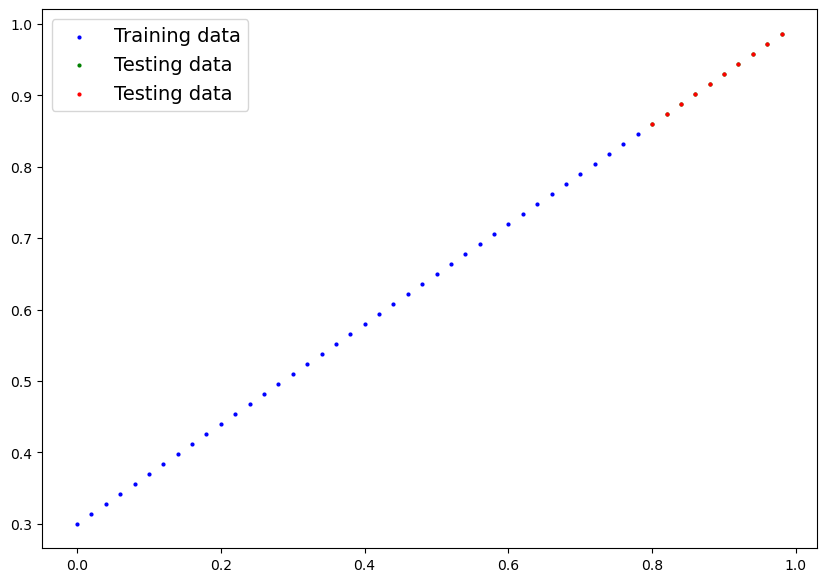

In [1220]:
plot_predictions(predictions=Y_preds_new)

In [1221]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_1 = LinearRegressionModel()

# Check out the parameters
list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [1222]:
# List named parameters
model_1.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [1223]:
# Setup an optimizer (stochastic gradient descent)
optimizer_1 = torch.optim.SGD(params=model_1.parameters(), # we want to optimize the parameters present in our model
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set

In [1224]:
optimizer_1

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [1225]:
# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 200

# Track different values
epoch_count = [] 
loss_values = []
test_loss_values = [] 

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_1.train() # train mode in PyTorch sets all parameters that require gradients to require gradients 

    # 1. Forward pass
    Y_preds = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(Y_preds, Y_train)

    # 3. Optimizer zero grad
    optimizer_1.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model (calculate gradients of each parameter)
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer_1.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

    ### Testing
    model_1.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes - https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=aftDZicoiUGiklEP179x7A
        # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
        # 1. Do the forward pass 
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, Y_test)

    # Print out what's happenin'
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        # Print out model state_dict()
        print(model_1.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weight', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weight', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weight', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [1226]:
with torch.inference_mode():
    Y_preds_new_1 = model_1(X_test)

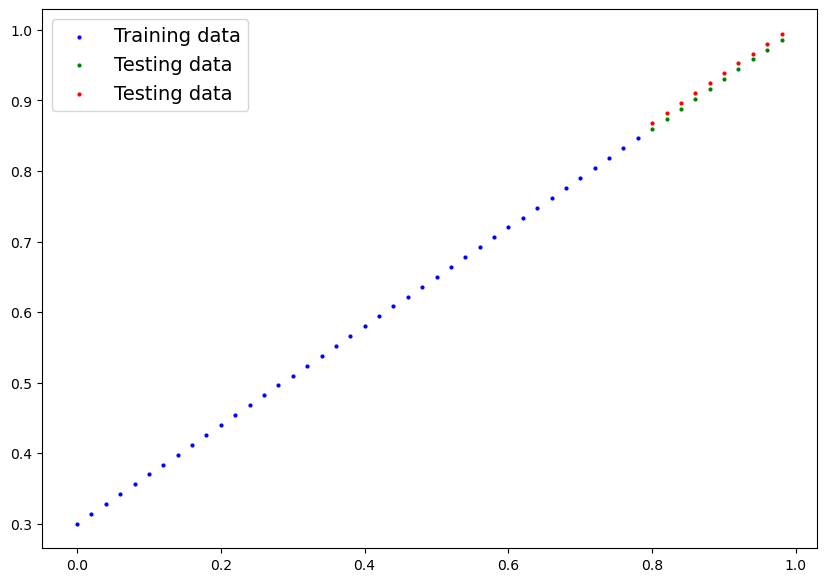

In [1227]:
plot_predictions(predictions=Y_preds_new_1)

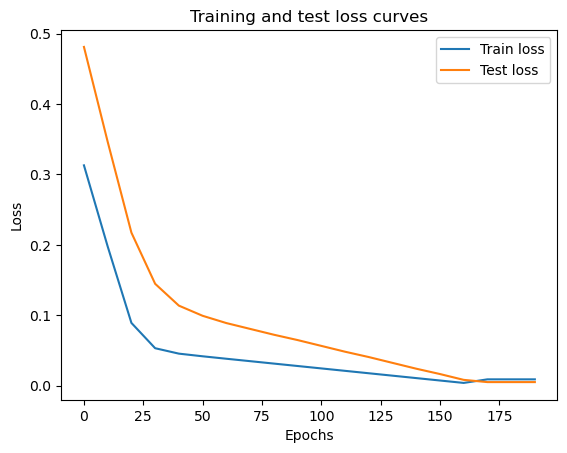

In [1228]:
import numpy as np

# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format 
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary 

PyTorch save & load code tutorial + extra-curriculum - https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference

In [1229]:
model_0.state_dict(), model_1.state_dict()

(OrderedDict([('weight', tensor([0.7059])), ('bias', tensor([0.2947]))]),
 OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))]))

In [1230]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving {model_0.state_dict()} to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving OrderedDict([('weight', tensor([0.7059])), ('bias', tensor([0.2947]))]) to: models\01_pytorch_workflow_model_0.pth


In [1231]:
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving {model_1.state_dict()} to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))]) to: models\01_pytorch_workflow_model_1.pth


In [1232]:
!ls -l models

total 12
-rw-r--r-- 1 HiRaD 197121 1680 Jul 17 21:18 01_pytorch_workflow_model_0.pth
-rw-r--r-- 1 HiRaD 197121 1680 Jul 17 21:18 01_pytorch_workflow_model_1.pth
-rw-r--r-- 1 HiRaD 197121 1744 Jul 17 21:13 01_pytorch_workflow_model_2.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that. 

In [1233]:
model_0.state_dict(), model_1.state_dict()

(OrderedDict([('weight', tensor([0.7059])), ('bias', tensor([0.2947]))]),
 OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))]))

In [1234]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_1 = LinearRegressionModel()

loaded_model_1.state_dict()

OrderedDict([('weight', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [1235]:
# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_1.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [1236]:
# Make some predictions with our loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_1(X_test)

loaded_model_preds, Y_preds_new_1

(tensor([[0.8685],
         [0.8825],
         [0.8965],
         [0.9105],
         [0.9245],
         [0.9384],
         [0.9524],
         [0.9664],
         [0.9804],
         [0.9944]]),
 tensor([[0.8685],
         [0.8825],
         [0.8965],
         [0.9105],
         [0.9245],
         [0.9384],
         [0.9524],
         [0.9664],
         [0.9804],
         [0.9944]]))

In [1237]:
# Compare loaded model preds with original model preds
loaded_model_preds == Y_preds_new_1

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [1238]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.0+cu118'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [1239]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data 

In [1240]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and Y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
Y = weight * X + bias
X[:10], Y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [1241]:
# Split data
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [1242]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  
  # Show the legend
  plt.legend(prop={"size": 14})

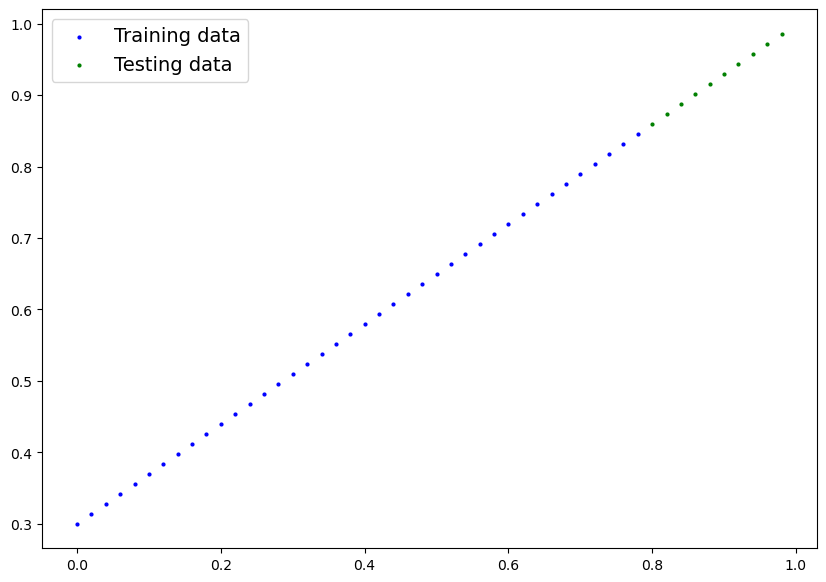

In [1243]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, Y_train, X_test, Y_test)

In [1244]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:\
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(33)
model_2 = LinearRegressionModelV2()
model_2, model_2.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.2372]])),
              ('linear_layer.bias', tensor([0.1175]))]))

In [1245]:
# Check the model current device
next(model_2.parameters()).device

device(type='cpu')

In [1246]:
# Set the model to use the target device
model_2.to(device)
next(model_2.parameters()).device

device(type='cuda', index=0)

In [1247]:
model_2.state_dict() 

OrderedDict([('linear_layer.weight', tensor([[0.2372]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1175], device='cuda:0'))])

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [1248]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer_2 = torch.optim.SGD(params=model_2.parameters(),
                              lr=0.01)

In [1249]:
# Let's write a training loop
torch.manual_seed(33)

epochs = 400

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = Y_train.to(device)
X_test = X_test.to(device)
y_test = Y_test.to(device)

for epoch in range(epochs):
    model_2.train()

    # 1. Forward pass
    y_pred = model_2(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer_2.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer_2.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test)

        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 10 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.3630196154117584 | Test loss: 0.5809561014175415
Epoch: 10 | Loss: 0.24780955910682678 | Test loss: 0.44624605774879456
Epoch: 20 | Loss: 0.1344919055700302 | Test loss: 0.31356287002563477
Epoch: 30 | Loss: 0.08070813864469528 | Test loss: 0.22276316583156586
Epoch: 40 | Loss: 0.06514310836791992 | Test loss: 0.17374522984027863
Epoch: 50 | Loss: 0.059373028576374054 | Test loss: 0.14795172214508057
Epoch: 60 | Loss: 0.055603623390197754 | Test loss: 0.13354167342185974
Epoch: 70 | Loss: 0.05211362987756729 | Test loss: 0.12252159416675568
Epoch: 80 | Loss: 0.04864923283457756 | Test loss: 0.11287528276443481
Epoch: 90 | Loss: 0.04521092399954796 | Test loss: 0.10528963059186935
Epoch: 100 | Loss: 0.04178248718380928 | Test loss: 0.0970170870423317
Epoch: 110 | Loss: 0.038345612585544586 | Test loss: 0.08874454349279404
Epoch: 120 | Loss: 0.03490899130702019 | Test loss: 0.08115888386964798
Epoch: 130 | Loss: 0.03148054704070091 | Test loss: 0.07288634032011032
Epoc

In [1250]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6920]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2995], device='cuda:0'))])

In [1251]:
weight, bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [1252]:
# Turn model into evaluation mode
model_2.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_2(X_test)
y_preds

tensor([[0.8531],
        [0.8669],
        [0.8808],
        [0.8946],
        [0.9085],
        [0.9223],
        [0.9361],
        [0.9500],
        [0.9638],
        [0.9777]], device='cuda:0')

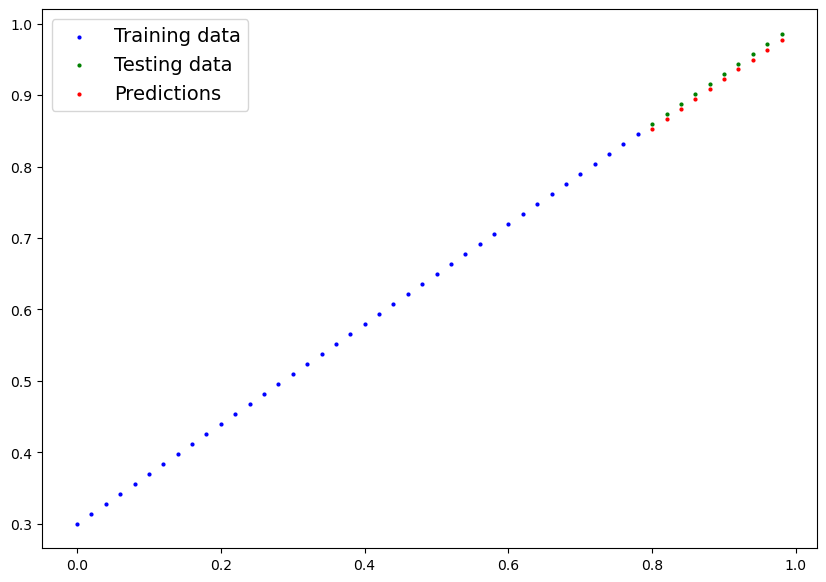

In [1253]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving & loading a trained model

In [1254]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving {model_2.state_dict()} to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving OrderedDict([('linear_layer.weight', tensor([[0.6920]], device='cuda:0')), ('linear_layer.bias', tensor([0.2995], device='cuda:0'))]) to: models\01_pytorch_workflow_model_2.pth


In [1255]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6920]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2995], device='cuda:0'))])

In [1256]:
# Load a PyTorch model

# Create a new instance of lienar regression model V2
loaded_model_2 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_2.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [1257]:
next(loaded_model_2.parameters()).device

device(type='cuda', index=0)

In [1258]:
loaded_model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6920]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2995], device='cuda:0'))])

In [1259]:
# Evaluate loaded model
loaded_model_2.eval()
with torch.inference_mode():
    loaded_model_2_preds = loaded_model_2(X_test)
y_preds == loaded_model_2_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercises & Extra-curriculum

For exercise & extra-curriculum, refer to: https://www.learnpytorch.io/01_pytorch_workflow/#exercises 